<a href="https://colab.research.google.com/github/Kimurist2024/000/blob/main/mnist_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1.データセットの読み込みと前処理
'''
#Fashion-MNISTデータセットをインポート
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

#正規化
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

x_train= x_train.astype('float32')/255
x_test=  x_test.astype('float32')/255

In [ ]:
'''
2.モデルの作成
'''
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(512,
                input_dim=784,
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,
                activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
  optimizer=SGD(learning_rate=0.1),
  metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
3.学習を行う
'''
from tensorflow.keras.callbacks import EarlyStopping

# 学習回数を設定
training_epochs = 20  # 学習回数

# ミニバッチのサイズ
batch_size = 64

# 学習終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss',  # 監視対象は損失
    patience=5  # 監視する回数
)

# 学習を行って進捗状況を出力
history = model.fit(
    x_train,  # 訓練データ
    y_train,  # 訓練ラベル
    epochs=training_epochs,  # 学習回数
    batch_size=batch_size,  # ミニバッチのサイズ
    verbose=1,
    validation_split=0.2,  # 検証データとして使用する割合
    shuffle=True,  # 検証データを抽出する際にシャッフル
    callbacks=[early_stopping]  # コールバックをリストで指定する
)



Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7080 - loss: 0.8448 - val_accuracy: 0.8301 - val_loss: 0.4699
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8235 - loss: 0.4918 - val_accuracy: 0.8528 - val_loss: 0.4085
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8441 - loss: 0.4319 - val_accuracy: 0.8587 - val_loss: 0.3921
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8536 - loss: 0.4034 - val_accuracy: 0.8561 - val_loss: 0.3931
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8578 - loss: 0.3965 - val_accuracy: 0.8710 - val_loss: 0.3612
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8639 - loss: 0.3772 - val_accuracy: 0.8718 - val_loss: 0.3572
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8688 - loss: 0.3641 - val_accuracy: 0.8665 - val_loss: 0.3609
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8713 - loss: 0.3529 - val_accuracy: 

In [ ]:
'''
4
'''
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.3326629102230072
Test accuracy: 0.8781999945640564


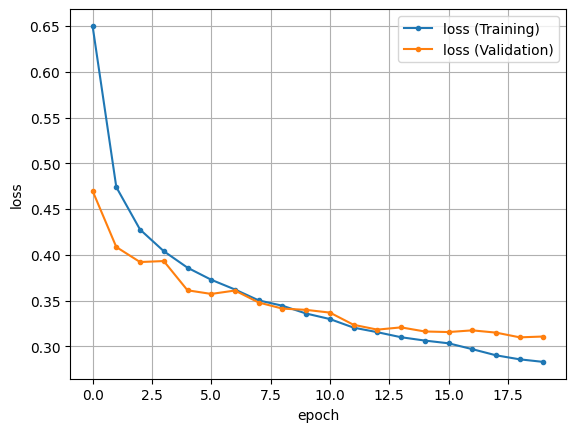

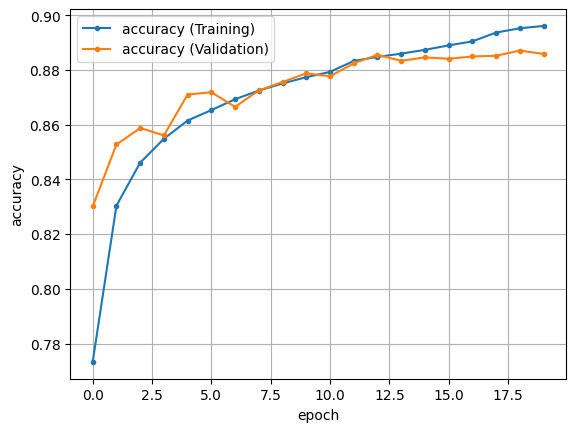

In [ ]:
'''
5.損失、正解率をグラフにする
'''
import matplotlib.pyplot as plt

# 訓練データの損失をプロット
plt.plot(
    history.history['loss'],
    marker='.',
    label='loss (Training)'
)

# 検証データの損失をプロット
plt.plot(
    history.history['val_loss'],
    marker='.',
    label='loss (Validation)'
)

plt.legend()  # 凡例を表示
plt.grid()  # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')  # y軸ラベル
plt.show()

# 訓練データの精度をプロット
plt.plot(
    history.history['accuracy'],
    marker='.',
    label='accuracy (Training)'
)

plt.plot(
    history.history['val_accuracy'],
    marker='.',
    label='accuracy (Validation)'
)

plt.legend()  # 凡例を表示
plt.grid()  # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('accuracy')  # y軸ラベル
plt.show()